<a href="https://colab.research.google.com/github/heysourin/Machine-Learning-Projects/blob/main/All%20Algorithms%20Applied/all_models_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **7 ML Models Applied on a dataset:**
- **Includes EDA**
---

### **Importing required libraries and dataset:**

In [ ]:
import seaborn as sns
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
### **Fare vs Survived: Probability density curve**

<Axes: xlabel='Fare', ylabel='Density'>

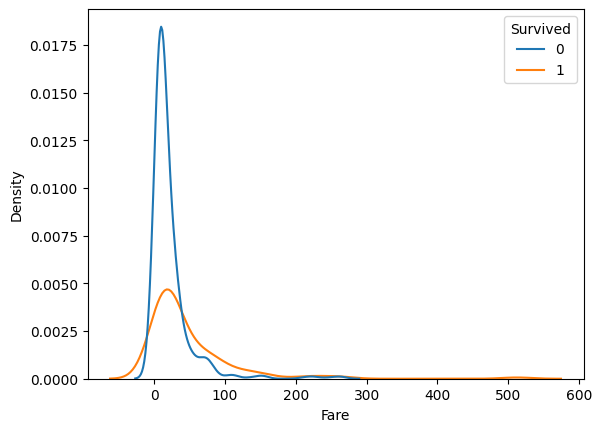

In [ ]:
sns.kdeplot(data=df, x='Fare', hue='Survived')

In [ ]:
df.shape

(891, 12)

---
### **Survived: Male vs Female**

<Axes: >

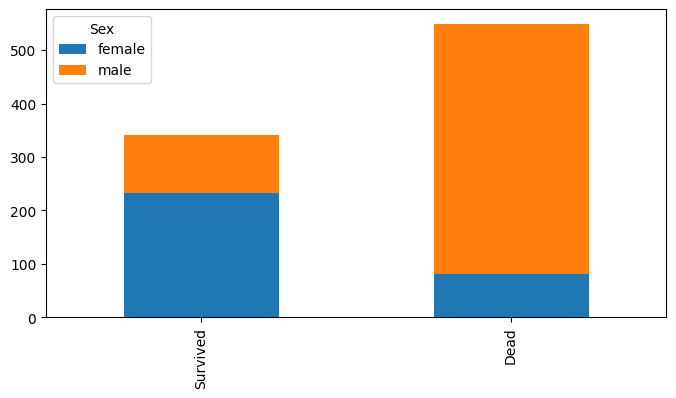

In [ ]:
survived = df[df["Survived"]==1]["Sex"].value_counts()
dead = df[df["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

---
### **Survived vs age probability density curve**

<Axes: xlabel='Age', ylabel='Density'>

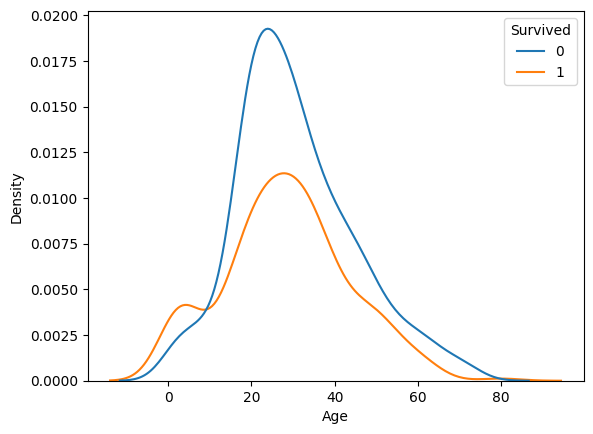

In [ ]:
sns.kdeplot(data=df, x='Age', hue='Survived')

<Axes: xlabel='Age'>

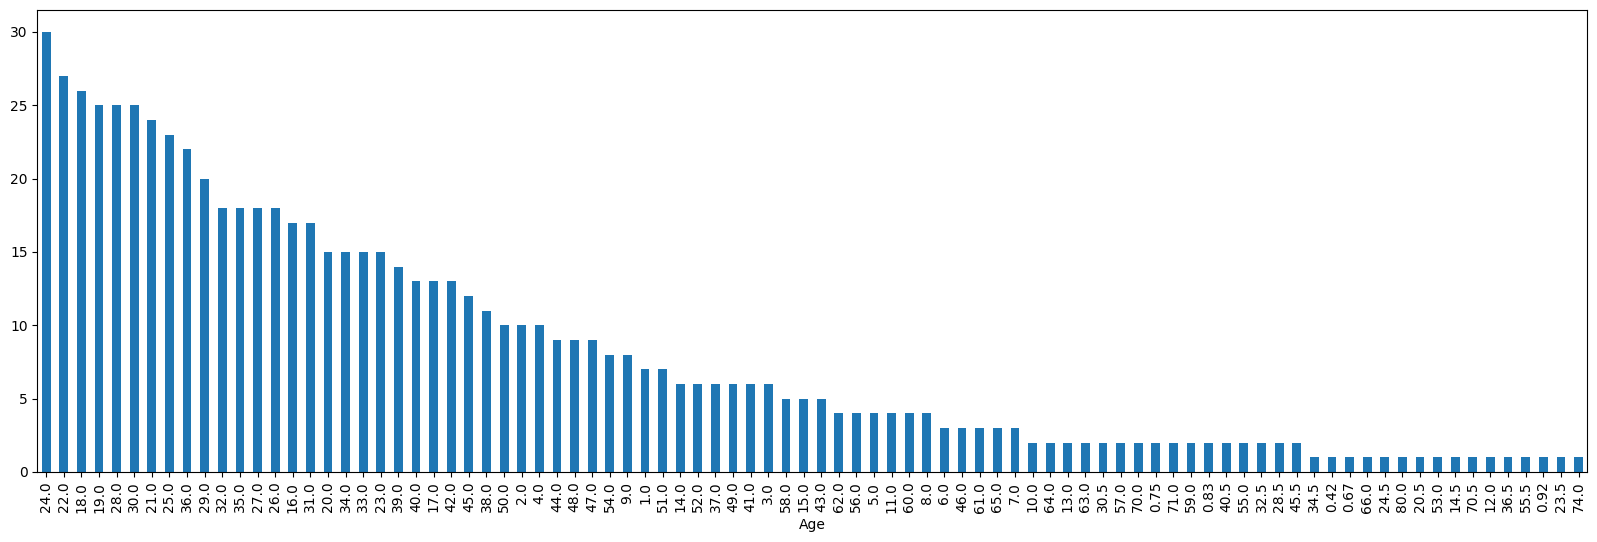

In [ ]:
df.Age.value_counts().plot(kind="bar", figsize=(20, 6))

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

<Axes: xlabel='Age'>

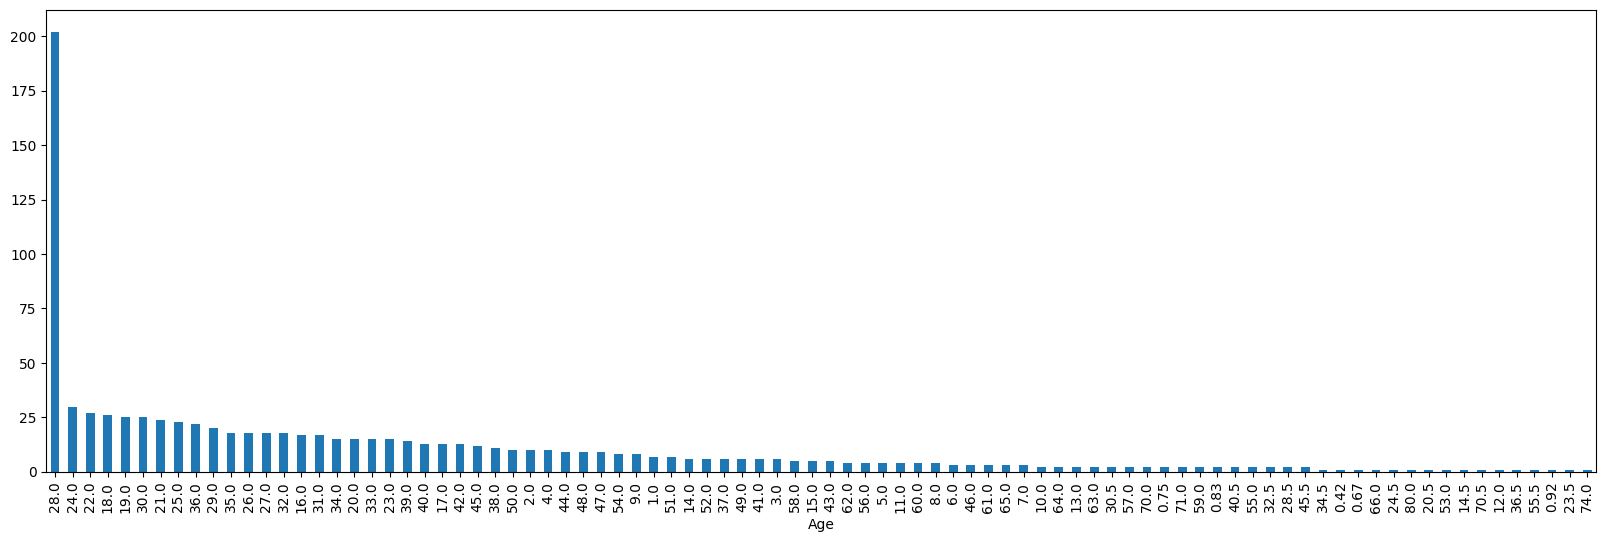

In [ ]:
df.Age.value_counts().plot(kind="bar", figsize=(20, 6))

In [ ]:
# Two 'Embarked' row is empty, replacing them with mode:
print(df['Embarked'].mode()[0]) # Prints most appeared
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

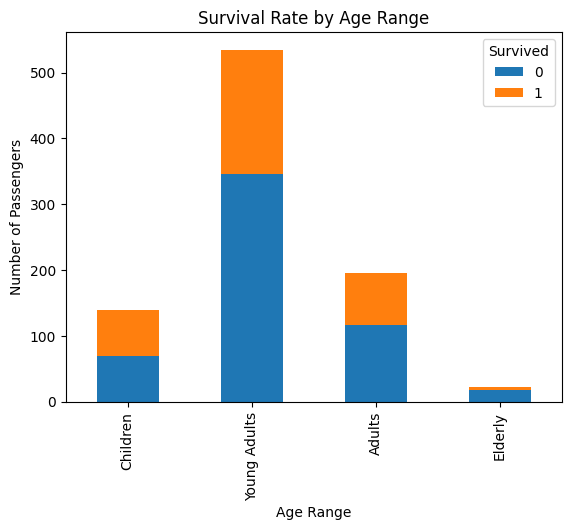

In [ ]:
import matplotlib.pyplot as plt

df['Age_range'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Children', 'Young Adults', 'Adults', 'Elderly'])

grouped_data = df.groupby(['Age_range', 'Survived']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Passengers')
plt.show()

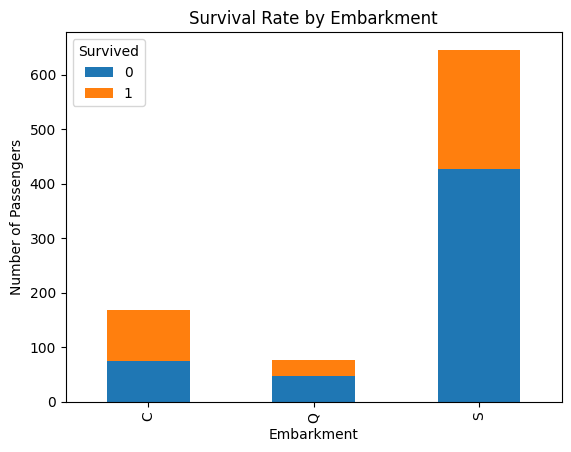

In [ ]:
df_embarked = df.groupby(['Embarked', 'Survived']).size().unstack()
df_embarked.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Embarkment')
plt.xlabel('Embarkment')
plt.ylabel('Number of Passengers')
plt.show()

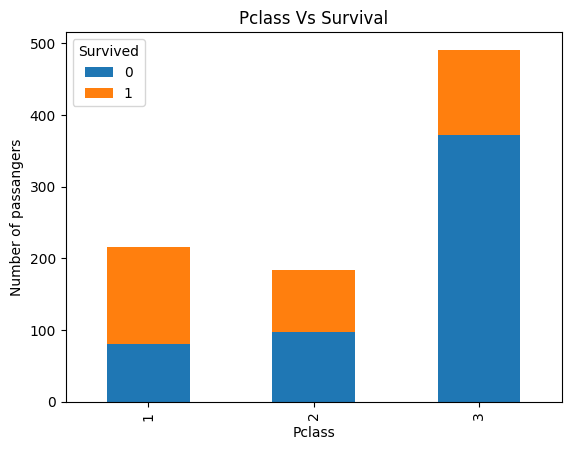

In [ ]:
df_pclass = df.groupby(['Pclass', 'Survived']).size().unstack()
df_pclass.plot(kind='bar', stacked=True)
plt.title("Pclass Vs Survival")
plt.xlabel("Pclass")
plt.ylabel("Number of passangers")
plt.show()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adults


In [ ]:
# Converting sex to numrical data
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])

In [ ]:
X = df[["Pclass", "Sex", "Age", "Fare", "Parch", "SibSp"]]
Y = df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

---
## **KNN:**

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  yhat = knn.predict(X_test)
  acc.append(accuracy_score(y_test,yhat))
  print("For k = ",i," : ",accuracy_score(y_test,yhat))

For k =  1  :  0.7653631284916201
For k =  2  :  0.7988826815642458
For k =  3  :  0.7877094972067039
For k =  4  :  0.8100558659217877
For k =  5  :  0.7877094972067039
For k =  6  :  0.7988826815642458
For k =  7  :  0.8044692737430168
For k =  8  :  0.7877094972067039
For k =  9  :  0.7988826815642458
For k =  10  :  0.7877094972067039
For k =  11  :  0.7877094972067039
For k =  12  :  0.776536312849162
For k =  13  :  0.776536312849162
For k =  14  :  0.776536312849162
For k =  15  :  0.7877094972067039
For k =  16  :  0.7821229050279329
For k =  17  :  0.7877094972067039
For k =  18  :  0.776536312849162
For k =  19  :  0.776536312849162
For k =  20  :  0.7653631284916201


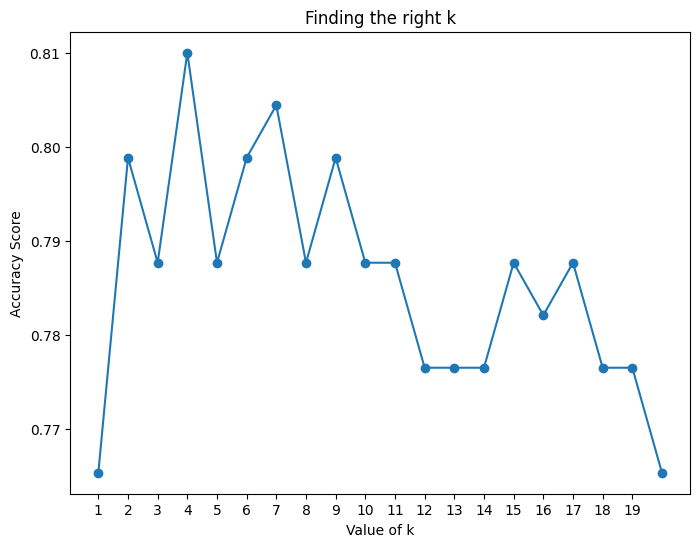

In [ ]:
# Plotting accurarcy with best 'k' value
plt.figure(figsize=(8,6))
plt.plot(range(1,21),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [ ]:
# So, preffered value of k = 4

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=4)

KNN.fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

print("Accuracy for training data : ",accuracy_score(y_test, y_pred_knn))

Accuracy for training data :  0.8100558659217877


---

## **Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
  clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
  clf_tree.fit(X_train, y_train)
  yhat = clf_tree.predict(X_test)
  depth.append(accuracy_score(y_test, yhat))
  print("For max depth = ",i, " : ", accuracy_score(y_test, yhat))

For max depth =  1  :  0.7821229050279329
For max depth =  2  :  0.7653631284916201
For max depth =  3  :  0.7988826815642458
For max depth =  4  :  0.7988826815642458
For max depth =  5  :  0.770949720670391
For max depth =  6  :  0.770949720670391
For max depth =  7  :  0.776536312849162


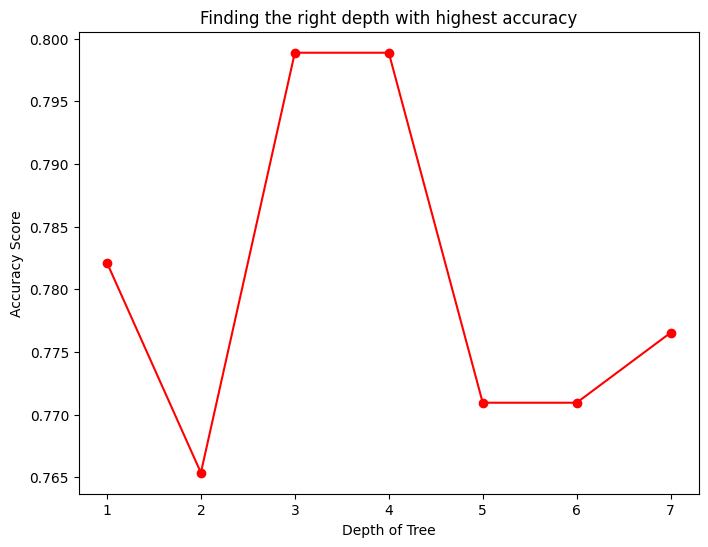

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

In [ ]:
# Best max_depth = 3
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X_train, y_train)

y_pred_dt = clf_tr.predict(X_test)


print("Accuracy for training data : ", accuracy_score(y_test, y_pred_dt))

Accuracy for training data :  0.7988826815642458


---

## **Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train, y_train)

y_pred_rf = clf_forest.predict(X_test)
print("Accuracy for training data : ", accuracy_score(y_test, y_pred_rf))

Accuracy for training data :  0.8100558659217877


---
## **SVM:**

In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

print("Accuracy for training data : ", accuracy_score(y_test, y_pred_svm))

Accuracy for training data :  0.8100558659217877


---
## **Naive Bayes:**

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)

y_pred_nb = clf_NB.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test, y_pred_nb))

Accuracy for training data :  0.770949720670391


---
## **Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(solver='liblinear', random_state=1)
regr.fit(X_train,y_train)

y_pred_lr = regr.predict(X_test)

print("Accuracy for training data : ",accuracy_score(y_test, y_pred_lr))

Accuracy for training data :  0.7988826815642458


---
## **Stochastic Gradient Descent Classifier:**

In [ ]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(loss="squared_error", penalty="l2", max_iter=4500, tol=1e-3, random_state=1)
clf_SGD.fit(X_train,y_train)

y_pred_sgdc = clf_SGD.predict(X_test)
print(accuracy_score(y_test,y_pred_sgdc))

0.3463687150837989


---
## **Comparing:**

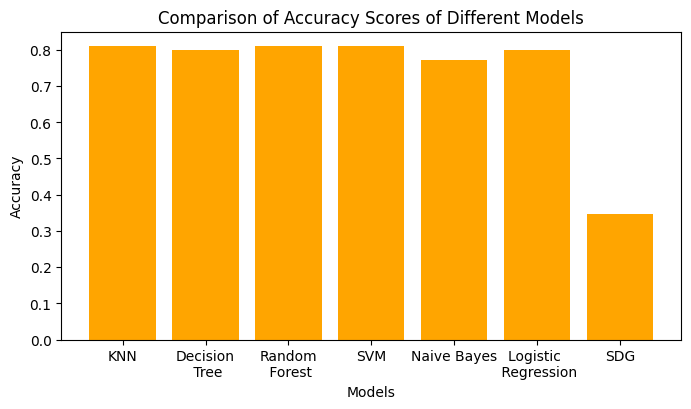

In [ ]:
accuracy_list = [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_sgdc)]
model_list = ["KNN", "Decision\n Tree", "Random\n Forest", "SVM", "Naive Bayes", "Logistic \n Regression", "SDG"]
plt.figure(figsize=(8, 4))
plt.bar(model_list, accuracy_list, color="orange")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy Scores of Different Models")
plt.show()

## **Conclusion:** SVM and Random Forest performs best